In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import glob
import subprocess

os.chdir("/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code")
import functions_calculate_image_average_extract_coordinates as pipeline_functions


colors = {'Target':'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown'}

def plot_dataset(images_path,reference_path,cam_type):
    cam_types = ['Mapir', 'Mapir', 'Stationary']
    if cam_type not in cam_types:
        raise ValueError("Invalid camera type. Expected one of: %s" % cam_types)

    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    images = images.sort_values(["flight", "image"], ascending = (True, True))
    images["order_all"] = list(range(1,len(images["file_name"]+1)))
    phantom_reflectance["file_name"] = phantom_reflectance["file_name"].str[:-4]
    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    reference_target = pd.read_csv(images_path)
    reference_target = reference_target.sort_values(["flight"], ascending = (True))
    reference_target["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
    reference_target["flight"] = "Target"
    combined = pd.concat([reference_target,reference_target])
    combined = combined.reset_index()
    combined["date"] = combined.date.astype(str)
    combined["date"] = [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in combined["date"]]
    #{['Phantom':0, 'Mapir':1, 'Stationary':2]}
    
    #need to apply function to each type of camera and then plot at once
    combined.plot(x="date", y="mean_red", kind="scatter",c=combined['flight'].map(colors),title='Image Reflectance Per Flight', xlabel = "Time", ylabel = "Red Reflectance", ax=axis[{'Phantom':0, 'Mapir':1, 'Stationary':2}[cam_type]])

  

Work with Phantom Data:
Step 1: Extract image metadata and coordinates from Phantom Images and Calculate averages:
Step 2: Read in averages, Remove, file extension Sort images and create an overall order and plot change in reflectance over time/



In [7]:
#general path to date folder
base_path = "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/"
proj_rel_path = "6_2019_Feb/2019_Feb_11/"
proj_base_path= base_path + proj_rel_path

In [8]:
phantom_path = proj_base_path + '/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path)
    
Phantom_images = pd.read_csv(phantom_path + "image_mean_reflectance.csv")
Phantom_images = Phantom_images.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images["order_all"] = list(range(1,len(Phantom_images["file_name"])+1))


if not os.path.exists(phantom_path + "images_metadata_gps.csv"):    
    pipeline_functions.extract_gps_metadat_multi_thred(phantom_path)

Phantom_images

Writing CSV with mean reflectance for 2008 images
Writing CSV with GPS info for 2008 images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
1988,0,2019_Feb_11_Phantom_Flight_1_1,1,1,2019:02:11 08:44:41,11.23,18.03,25.02,26.98,8.33,15.19,1
1870,0,2019_Feb_11_Phantom_Flight_1_2,1,2,2019:02:11 08:44:43,11.34,17.70,25.32,26.32,8.30,14.87,2
1775,0,2019_Feb_11_Phantom_Flight_1_3,1,3,2019:02:11 08:44:45,11.73,18.26,25.49,26.80,8.61,15.21,3
1594,0,2019_Feb_11_Phantom_Flight_1_4,1,4,2019:02:11 08:44:47,12.11,18.40,25.71,26.42,8.87,15.40,4
1523,0,2019_Feb_11_Phantom_Flight_1_5,1,5,2019:02:11 08:44:49,12.39,18.61,25.64,26.47,8.96,15.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0,2019_Feb_11_Phantom_Flight_5_339,5,339,2019:02:11 10:19:13,6.65,12.57,19.81,17.50,7.84,13.45,2004
277,0,2019_Feb_11_Phantom_Flight_5_340,5,340,2019:02:11 10:19:15,6.89,13.19,19.84,17.82,8.00,13.99,2005
338,0,2019_Feb_11_Phantom_Flight_5_341,5,341,2019:02:11 10:19:17,7.95,14.76,21.59,19.07,9.16,15.55,2006
459,0,2019_Feb_11_Phantom_Flight_5_342,5,342,2019:02:11 10:19:19,8.92,15.69,22.77,19.62,9.90,16.34,2007


Read in Phantom Reflectance Target Images

In [9]:
Phantom_Reflectance_path= proj_base_path + '/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path)
    

phantom_reflectance = pd.read_csv(Phantom_Reflectance_path + "image_mean_reflectance.csv")
phantom_reflectance = phantom_reflectance.sort_values(["flight"], ascending = (True))
phantom_reflectance["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
phantom_reflectance["flight"] = "Target"
phantom_reflectance


Writing CSV with mean reflectance for 22 images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,2019_Feb_11_Flight_2_Post_1,Target,1,2019:02:11 09:23:24,47.28,52.11,57.29,56.29,26.10,46.98,1
18,0,2019_Feb_11_Flight_1_Post_1,Target,1,2019:02:11 09:00:37,40.27,45.95,54.81,50.32,27.63,42.50,2
16,0,2019_Feb_11_Flight_4_Post_1,Target,1,2019:02:11 10:01:52,76.57,59.30,99.71,59.37,50.61,57.49,3
14,0,2019_Feb_11_Flight_4_Post_2,Target,2,2019:02:11 10:01:54,81.52,59.63,100.96,59.01,51.01,56.40,4
12,0,2019_Feb_11_Flight_3_Post_3,Target,3,2019:02:11 09:42:29,62.26,54.57,80.12,58.46,44.15,53.92,5
11,0,2019_Feb_11_Flight_3_Post_2,Target,2,2019:02:11 09:42:27,60.69,52.63,80.39,55.33,44.21,49.91,6
9,0,2019_Feb_11_Flight_3_Post_1,Target,1,2019:02:11 09:42:25,46.13,42.78,66.99,45.19,32.65,39.64,7
21,0,2019_Feb_11_Flight_1_Post_2,Target,2,2019:02:11 09:00:39,41.39,49.04,54.47,54.17,29.13,46.72,8
4,0,2019_Feb_11_Flight_5_Post_1,Target,1,2019:02:11 10:20:29,24.78,38.24,33.85,39.83,15.04,41.78,9
3,0,2019_Feb_11_Flight_5_Post_2,Target,2,2019:02:11 10:20:31,33.07,51.03,42.21,53.23,26.49,59.68,10


Combine Phantom Images with the reflectance target data

In [10]:

phantom = pd.concat([phantom_reflectance,Phantom_images])
phantom = phantom.reset_index()
phantom["date"] = phantom.date.astype(str)
phantom["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom["date"]]
phantom

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,0,2019_Feb_11_Flight_2_Post_1,Target,1,2019-02-11 09:23:24,47.28,52.11,57.29,56.29,26.10,46.98,1
1,18,0,2019_Feb_11_Flight_1_Post_1,Target,1,2019-02-11 09:00:37,40.27,45.95,54.81,50.32,27.63,42.50,2
2,16,0,2019_Feb_11_Flight_4_Post_1,Target,1,2019-02-11 10:01:52,76.57,59.30,99.71,59.37,50.61,57.49,3
3,14,0,2019_Feb_11_Flight_4_Post_2,Target,2,2019-02-11 10:01:54,81.52,59.63,100.96,59.01,51.01,56.40,4
4,12,0,2019_Feb_11_Flight_3_Post_3,Target,3,2019-02-11 09:42:29,62.26,54.57,80.12,58.46,44.15,53.92,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,1067,0,2019_Feb_11_Phantom_Flight_5_339,5,339,2019-02-11 10:19:13,6.65,12.57,19.81,17.50,7.84,13.45,2004
2026,277,0,2019_Feb_11_Phantom_Flight_5_340,5,340,2019-02-11 10:19:15,6.89,13.19,19.84,17.82,8.00,13.99,2005
2027,338,0,2019_Feb_11_Phantom_Flight_5_341,5,341,2019-02-11 10:19:17,7.95,14.76,21.59,19.07,9.16,15.55,2006
2028,459,0,2019_Feb_11_Phantom_Flight_5_342,5,342,2019-02-11 10:19:19,8.92,15.69,22.77,19.62,9.90,16.34,2007


<AxesSubplot:title={'center':'Phantom'}, xlabel='Time', ylabel='Red Reflectance'>

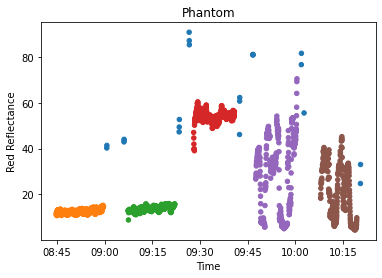

In [11]:
ax_1 = phantom.plot(x="date", y="mean_red", kind="scatter",c=phantom['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance")
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
date_form = DateFormatter('%H:%M')
ax_1.xaxis.set_major_formatter(date_form)


ax_1

Read in MAPIR Images, these are the images collected by MAPIR on the drone. Note that images are in two different folders from on Oct 2nd.
Remove, file extension
Sort images and create an overall order

In [12]:
MAPIR_path= proj_base_path + "/Proccessed_Images/MAPIR/Processed_1/"

if not os.path.exists(MAPIR_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_path)

Mapir_images = pd.read_csv(MAPIR_path + "image_mean_reflectance.csv")

Mapir_images = Mapir_images.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images["order_all"] = list(range(1,len(Mapir_images["file_name"])+1))
Mapir_images

Writing CSV with mean reflectance for 1019 images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
500,0,2019_Feb_11_MAPIR_Flight_1_1_A,1,1,2019:02:11 08:44:15,38.87,17.40,44.38,20.37,36.34,16.27,1
198,0,2019_Feb_11_MAPIR_Flight_1_2_A,1,2,2019:02:11 08:44:19,38.77,17.45,44.33,20.48,36.22,16.26,2
413,0,2019_Feb_11_MAPIR_Flight_1_3_A,1,3,2019:02:11 08:44:23,38.54,17.79,44.05,20.89,35.97,16.57,3
96,0,2019_Feb_11_MAPIR_Flight_1_4_A,1,4,2019:02:11 08:44:27,37.50,16.99,42.81,20.05,34.89,15.78,4
264,0,2019_Feb_11_MAPIR_Flight_1_5_A,1,5,2019:02:11 08:44:31,37.87,15.78,43.07,18.60,35.21,14.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,2019_Feb_11_MAPIR_Flight_5_168_A,5,168,2019:02:11 10:19:28,14.68,4.54,16.87,5.36,13.42,4.20,1015
497,0,2019_Feb_11_MAPIR_Flight_5_169_A,5,169,2019:02:11 10:19:32,14.89,4.61,17.08,5.40,13.64,4.31,1016
454,0,2019_Feb_11_MAPIR_Flight_5_170_A,5,170,2019:02:11 10:19:36,14.59,4.56,16.74,5.33,13.46,4.41,1017
163,0,2019_Feb_11_MAPIR_Flight_5_171_A,5,171,2019:02:11 10:19:40,15.20,4.73,17.45,5.56,13.97,4.46,1018


Read in MAPAIR reflectance target images and concatinate into single dataframe


In [13]:
MAPIR_reflectance= proj_base_path + "/Reflectance/MAPIR/"

if not os.path.exists(MAPIR_reflectance + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_reflectance)

Mapir_reflectance = pd.read_csv(MAPIR_reflectance + "image_mean_reflectance.csv")
Mapir_reflectance = Mapir_reflectance.sort_values(["flight", "image"], ascending = (True, True))
Mapir_reflectance["order_all"] = list(range(1,len(Mapir_reflectance["file_name"])+1))
Mapir_reflectance["flight"] = "Target"

Mapir = pd.concat([Mapir_reflectance,Mapir_images])
Mapir = Mapir.reset_index()
Mapir["date"] = Mapir.date.astype(str)
Mapir["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir["date"]]
Mapir

Writing CSV with mean reflectance for 11 images


,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,0,2019_Feb_11_Flight_3_PRE_1_B,Target,1,2019-02-11 09:26:39,130.89,24.63,133.59,27.20,143.71,26.26,1
1,5,0,2019_Feb_11_Flight_2_PRE_1_B,Target,1,2019-02-11 09:06:00,119.29,35.04,121.97,37.76,126.90,31.85,2
2,7,0,2019_Feb_11_Flight_1_PRE_1_B,Target,1,2019-02-11 08:25:30,112.05,55.34,116.43,58.31,101.59,42.13,3
3,8,0,2019_Feb_11_Flight_4_PRE_1_B,Target,1,2019-02-11 09:46:52,139.11,22.72,141.66,24.77,154.10,26.57,4
4,3,0,2019_Feb_11_Flight_1_PRE_2_B,Target,2,2019-02-11 08:42:43,130.36,24.03,132.94,25.83,142.79,23.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,187,0,2019_Feb_11_MAPIR_Flight_5_168_A,5,168,2019-02-11 10:19:28,14.68,4.54,16.87,5.36,13.42,4.20,1015
1026,497,0,2019_Feb_11_MAPIR_Flight_5_169_A,5,169,2019-02-11 10:19:32,14.89,4.61,17.08,5.40,13.64,4.31,1016
1027,454,0,2019_Feb_11_MAPIR_Flight_5_170_A,5,170,2019-02-11 10:19:36,14.59,4.56,16.74,5.33,13.46,4.41,1017
1028,163,0,2019_Feb_11_MAPIR_Flight_5_171_A,5,171,2019-02-11 10:19:40,15.20,4.73,17.45,5.56,13.97,4.46,1018


Read in Stationary Reflectance
*note october 2nd the folders are messed up so you have to use this special function

In [17]:
import PIL.Image
from PIL import ImageStat
from PIL.TiffTags import TAGS
import pandas as pd
from numpy import asarray
import os
import glob
import concurrent.futures
from datetime import datetime
from GPSPhoto import gpsphoto
from pandas.tseries.offsets import Nano


def calc_image_average_stationary(path = False):
    paths=glob.glob(os.path.join(Station_path,"*"), recursive = False)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        df_list = executor.map(pipeline_functions.proc_image_stationary, paths)
    
    df_list = list(df_list)
    df = pd.concat(list(df_list))
    print("Writing CSV with mean reflectance for {} images".format(len(df.file_name)))        
    df.to_csv(path + "image_mean_reflectance.csv")

Station_path= proj_base_path + "Reflectance/Stationary_Reflectance/Processed_1/"

if not os.path.exists(Station_path + "image_mean_reflectance.csv"):    
    calc_image_average_stationary(Station_path)

stationary_refectance = pd.read_csv(Station_path + "image_mean_reflectance.csv")


stationary_refectance = stationary_refectance.sort_values(["date"], ascending = (True))
stationary_refectance["order_all"] = list(range(1,len(stationary_refectance["file_name"])+1))

stationary_refectance["date"] = stationary_refectance.date.astype(str)
stationary_refectance["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in stationary_refectance["date"]]
stationary_refectance["flight"] = 1
stationary_refectance["image"] = stationary_refectance["order_all"]

#stationary_refectance

Writing CSV with mean reflectance for 500 images


Adjust Time Stamp values that were messed up due to cameras not being insync

Phantom = Correct
MAPIR = 3 Hours Early
Stationary = Correct


In [ ]:
hours_added = dt.timedelta(hours = 2)
Mapir["date"] = Mapir["date"]+hours_added
phantom["date"] = phantom["date"]+hours_added

<AxesSubplot:title={'center':'Phantom'}, xlabel='Time', ylabel='Red Reflectance'>

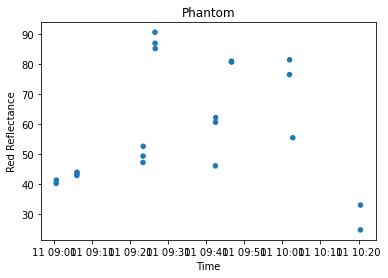

In [18]:
phantom_target = phantom[phantom["flight"] == "Target"]
phantom_target

phantom_target.plot(x="date", y="mean_red", kind="scatter",c=phantom_target['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance")
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
#date_form = DateFormatter('%H:%M')
#ax_1.xaxis.set_major_formatter(date_form)


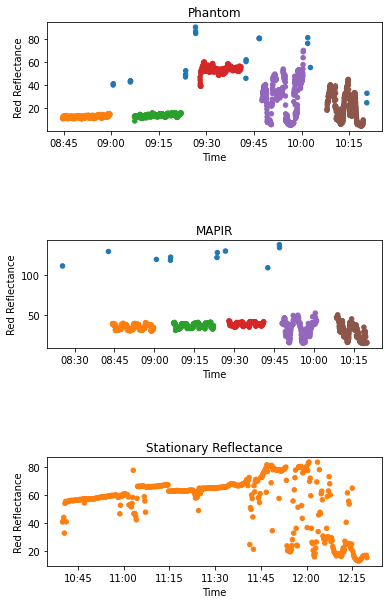

In [20]:

figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom.plot(x="date", y="mean_red", kind="scatter",c=phantom['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [itemfigure, axis = plt.subplots(3, 1).strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
date_form = DateFormatter('%H:%M')
ax_1.xaxis.set_major_formatter(date_form)


ax_1

# Mapir Data
ax_2 = Mapir.plot(x="date", y="mean_red", kind="scatter",c=Mapir['flight'].map(colors),title='MAPIR', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
#ticklabels_2 = ['']*len(Mapir.index)
# Every 4th ticklable shows the month and day
#ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir.date[::2]]
#ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
ax_2.xaxis.set_major_formatter(date_form)
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
#ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
#ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
#ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))
ax_3.xaxis.set_major_formatter(date_form)


plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
#plt.savefig(proj_base_path + 'Proccessed_Images/1_Raw_Reflectance_2018_Feb_28.png', bbox_inches='tight')


#Next Images have to be normalized:

Step 1: identify normalization images. 
    for October 2nd. We use:
    Phantom: "2018_Oct_02_Phantom_Flight_1_48.JPG" 
    Mapir: destImage_rel="2018_Oct_02_MAPIR_Flight_1_18_A.tif" 
Step 2: 
    Normalize data using the following bash/python code




In [ ]:
proj_base_path

In [21]:
#Phantom Images
sourceFolder = proj_rel_path + "/Proccessed_Images/Phantom"
destImage_rel = "2019_Feb_11_Phantom_Flight_3_365.JPG"

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $sourceFolder -destImage $destImage -image @'
subprocess.call(command,shell=True)



creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/output/
creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/output/
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_101.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_1.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_104.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_10.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mappi

Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 44, in <module>
    os.mkdir(destOutput)
FileExistsError: [Errno 17] File exists: '/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/output/'


/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_107.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_108.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_11.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_109.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_112.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/6_2019_Feb/2019_Feb_11//Proccessed_Images/Phantom/2019_Feb_11_Phantom_Flight_1_111.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Dro

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 55, in <module>
    HistSpecHSV.ImageTransform(srcImg, refimage,destOutput,arguments.reflectance_target)
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/histogram_specification_v4_HSV_simple.py", line 140, in ImageTransform
    img1 = cv2.imread(input1)
KeyboardInterrupt
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 55, in <module>
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 55, in <module>
    HistSpecHSV.ImageTransform(srcImg, refimage,destOutput,arguments.reflectance_target)

In [ ]:
#Phantom Reflectance Tartget

sourceFolder = "/6_2019_Feb/2019_Feb_6/Proccessed_Images/Phantom"
destImage_rel = "2019_Feb_06_Phantom_Flight_3_414.JPG"
reflectance_folder="6_2019_Feb/2019_Feb_6/Reflectance/Phantom"


command = 'sourceFolder=' + sourceFolder + '; ' + 'reflectance_folder=' + reflectance_folder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${reflectance_folder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $reflectance_folder -destImage $destImage -image @ -reflectance_target "yes"'


subprocess.call(command,shell=True)



Now that all normalized images have been created, we need to add back in the exif data to the normalized images with Exif tools.

First add the phantom images back in

In [ ]:
#Phantom Images

sourceFolder = "/6_2019_Feb/2019_Feb_6/Proccessed_Images/Phantom"
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#Phantom Reflectance
sourceFolder='6_2019_Feb/2019_Feb_6/Reflectance/Phantom/'
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
proj_base_path
proj_base_path + '/Proccessed_Images/Phantom/'

In [ ]:
phantom_path = proj_base_path + '/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path +"output/"+"image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path,post_norm=True)
    
Phantom_images_post_norm = pd.read_csv(phantom_path + "output/" "image_mean_reflectance.csv")
Phantom_images_post_norm = Phantom_images_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images_post_norm["order_all"] = list(range(1,len(Phantom_images_post_norm["file_name"])+1))

if not os.path.exists(phantom_path + "output/" + "images_metadata_gps.csv"):    
    pipeline_functions.extract_gps_metadat_multi_thred(phantom_path + "output/")



Phantom_images_post_norm




In [ ]:
Phantom_Reflectance_path= proj_base_path +  '/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path,post_norm=True)
    

phantom_reflectance_post_norm = pd.read_csv(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv")
phantom_reflectance_post_norm = phantom_reflectance_post_norm.sort_values(["flight"], ascending = (True))
phantom_reflectance_post_norm["order_all"] = list(range(1,len(phantom_reflectance_post_norm["file_name"])+1))
phantom_reflectance_post_norm["flight"] = "Target"
phantom_reflectance_post_norm




In [ ]:
phantom_post_norm = pd.concat([phantom_reflectance_post_norm,Phantom_images_post_norm])
phantom_post_norm = phantom_post_norm.reset_index()
phantom_post_norm["date"] = phantom_post_norm.date.astype(str)
phantom_post_norm["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom_post_norm["date"]]


phantom_post_norm["GCC"] = phantom_post_norm["mean_green"]/(phantom_post_norm["mean_red"]+phantom_post_norm["mean_green"]+phantom_post_norm["mean_blue"])
phantom_post_norm

In [ ]:
figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom.plot(x="date", y="mean_red", kind="scatter",c=phantom['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [itemfigure, axis = plt.subplots(3, 1).strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
date_form = DateFormatter('%H:%M')
ax_1.xaxis.set_major_formatter(date_form)


ax_1

# Phantom Data Post Norm
ax_2 = phantom_post_norm.plot(x="date", y="mean_red", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
#ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
#ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
#ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))
ax_3.xaxis.set_major_formatter(date_form)


plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)

#Prepare Phantom Project metashape foulder

In [ ]:
metashape_base = "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/000_metashape_projects/bluewaters_push/"
base_path = "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/"
date_rel_path = "6_2019_Feb/2019_Feb_6"

proj_name = date_rel_path[0]+"A_Phantom_"+date_rel_path.split("/")[1]

if not os.path.exists(metashape_base +  proj_name):
    os.makedirs(metashape_base +  proj_name)
    os.makedirs(metashape_base +  proj_name + "/images")

source = base_path + date_rel_path + "/Proccessed_Images/Phantom/output/"
dest = metashape_base +  proj_name + "/images"
dest
command = "source=" + source + " ; dest=" + dest + " ; /opt/homebrew/bin/rclone sync $source $dest -v"

subprocess.call(command,shell=True, executable='/bin/bash')
csv= dest + "/*.csv"
csv_dest = metashape_base +  proj_name
command_2 = "csv=" + csv +" ; csv_dest=" + csv_dest + " ;  mv $csv $csv_dest"

subprocess.call(command_2,shell=True, executable='/bin/bash')

#MAPIR Calibrated

MAPIR_1_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_1_3/Calibrated_1/"

if not os.path.exists(MAPIR_1_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_1_path)

Mapir_images_1_3_calibrated = pd.read_csv(MAPIR_1_path + "image_mean_reflectance.csv")

MAPIR_2_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_4_5/Calibrated_1/"

if not os.path.exists(MAPIR_2_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_2_path)

Mapir_images_4_5_calibrated = pd.read_csv(MAPIR_2_path + "image_mean_reflectance.csv")

Mapir_images_calibrated = pd.concat([Mapir_images_1_3_calibrated,Mapir_images_4_5_calibrated])
Mapir_images_calibrated = Mapir_images_calibrated.reset_index()


Mapir_images_calibrated = Mapir_images_calibrated.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images_calibrated["order_all"] = list(range(1,len(Mapir_images_calibrated["file_name"])+1))

Mapir_images_calibrated





Mapir_calibrated = pd.concat([Mapir_reflectance,Mapir_images_calibrated])
Mapir_calibrated = Mapir_calibrated.reset_index()
Mapir_calibrated["date"] = Mapir_calibrated.date.astype(str)
Mapir_calibrated["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir_calibrated["date"]]

Mapir_calibrated["NDVI"] = (Mapir_calibrated["mean_blue"]-Mapir_calibrated["mean_red"])/(Mapir_calibrated["mean_blue"]+ Mapir_calibrated["mean_red"])

Mapir_calibrated

figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="mean_red", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_post_norm.plot(x="date", y="mean_red", kind="scatter",c=Mapir_post_norm['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_post_norm.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization.png', bbox_inches='tight')


figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="GCC", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_calibrated.plot(x="date", y="NDVI", kind="scatter",c=Mapir_calibrated['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_calibrated.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_calibrated.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization_calibration.png', bbox_inches='tight')